# Análisis de Entrada II: herramientas adicionales

Prof. Tito Homem-de-Mello

## Retomemos el problema de energía estudiado anteriormente

In [33]:
install.packages('fitdistrplus')
install.packages('ggplot2')
install.packages('nortest')
install.packages('tidyr')
install.packages('data.table')
install.packages('lubridate')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [34]:
library(fitdistrplus)
library(data.table)
library(ggplot2)
library(tidyr)
library(lubridate)

In [35]:
#Ajustes para gráficos via ggplot
mytheme <- theme(plot.title = element_text(size = 22),
                    axis.title.y=element_text(size = 20),
                    axis.text.y=element_text(size = 15),
                    axis.title.x=element_text(size = 20),
                    axis.text.x=element_text(size = 15),
                    legend.position="bottom",
                    legend.text=element_text(size = 15),
                    legend.title=element_text(size = 15))

In [36]:
energy <- fread("energy_dataset.csv")
head(energy)

time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,⋯,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-12-31 23:00:00,447,329,0,4844,4821,162,0,0,0,⋯,196,0,6378,17,NA,6436,26118,25385,50.10,65.41
2015-01-01 00:00:00,449,328,0,5196,4755,158,0,0,0,⋯,195,0,5890,16,NA,5856,24934,24382,48.10,64.92
2015-01-01 01:00:00,448,323,0,4857,4581,157,0,0,0,⋯,196,0,5461,8,NA,5454,23515,22734,47.33,64.48
2015-01-01 02:00:00,438,254,0,4314,4131,160,0,0,0,⋯,191,0,5238,2,NA,5151,22642,21286,42.27,59.32
2015-01-01 03:00:00,428,187,0,4130,3840,156,0,0,0,⋯,189,0,4935,9,NA,4861,21785,20264,38.41,56.04
2015-01-01 04:00:00,410,178,0,4038,3590,156,0,0,0,⋯,188,0,4618,4,NA,4617,21441,19905,35.72,53.63


In [61]:
data_ccb<-energy[(year(time)==2017 &
                month(time)==12 & mday(time)<27) | (year(time)==2017 &
                month(time)==11 & mday(time)>26)  ,
             .(anio=year(time),  
              dia= mday(time), 
               hora= hour(time),
                solar=`forecast solar day ahead`,
                eol=`forecast wind onshore day ahead`,
                dem=`total load forecast`,
                precio=`price actual`,
                time= as.POSIXct(time)) ]  #Guarda el campo "time" para uso posterior

test_ccb<-energy[year(time)==2017 &
                month(time)==12 & mday(time)==27,
             .(anio=year(time),  
              dia= mday(time), 
               hora= hour(time),
                solar=`forecast solar day ahead`,
                eol=`forecast wind onshore day ahead`,
                dem=`total load forecast`)]


price_ccb_test <- energy[year(time)==2017 &
                month(time)==12 & mday(time)==27,.(precio=`price actual`)]




In [62]:
data_ccb

anio,dia,hora,solar,eol,dem,precio,time
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2017,27,0,3,3889,23641,55.78,2017-11-27 00:00:00
2017,27,1,3,3565,22593,54.15,2017-11-27 01:00:00
2017,27,2,2,3186,22234,53.89,2017-11-27 02:00:00
2017,27,3,0,2752,22371,53.89,2017-11-27 03:00:00
2017,27,4,0,2435,23180,56.71,2017-11-27 04:00:00
2017,27,5,4,2175,26190,70.79,2017-11-27 05:00:00
2017,27,6,20,1916,30821,75.45,2017-11-27 06:00:00
2017,27,7,161,1672,33560,77.50,2017-11-27 07:00:00
2017,27,8,677,1543,34757,78.28,2017-11-27 08:00:00


In [63]:
data_price=data_ccb$precio
data_price

[1] 55.78 54.15 53.89 53.89 56.71 70.79 75.45 77.50 78.28 76.50 75.40 75.16
 [13] 74.16 74.15 75.46 75.72 78.81 85.81 83.99 83.92 82.60 76.09 73.97 76.04
 [25] 71.44 61.31 59.74 57.75 57.39 69.51 78.24 81.62 81.75 83.51 81.95 79.86
 [37] 77.62 75.39 74.13 76.77 82.90 86.70 86.23 82.70 81.11 73.26 70.31 73.55
 [49] 64.13 58.13 57.52 57.03 57.30 67.54 79.13 81.17 82.09 82.08 81.96 81.36
 [61] 81.10 79.37 77.35 76.21 81.33 84.39 83.80 83.38 76.50 69.89 68.18 62.98
 [73] 60.02 58.22 56.73 56.62 58.83 68.54 79.30 82.12 82.78 83.18 82.44 82.26
 [85] 82.65 80.85 78.83 79.40 82.43 86.01 86.00 85.25 78.66 74.72 74.22 75.76
 [97] 65.74 63.77 57.21 56.62 59.58 61.10 76.18 80.24 80.77 79.50 78.14 74.48
[109] 69.34 64.09 63.93 65.68 76.72 84.60 86.11 86.06 79.50 77.67 76.38 68.61
[121] 63.69 60.73 59.37 57.54 57.35 58.75 60.47 67.74 75.05 76.83 74.30 72.98
[133] 66.04 62.20 59.72 59.76 62.07 78.07 78.30 77.85 73.90 71.86 69.13 63.22
[145] 60.38 58.30 56.30 54.73 54.81 56.77 59.30 60.93 62.57 66.49 68.22 70.67
[157] 67.79 64.32 63.10 63.64 76.23 82.40 82.99 81.38 80.34 77.13 75.17 72.75
[169] 63.54 60.55 60.12 61.01 63.06 73.76 81.22 83.44 84.57 86.15 85.40 85.24
[181] 83.74 82.89 83.24 83.57 86.43 90.29 90.59 89.74 83.09 80.35 75.56 75.43
[193] 71.75 66.92 64.07 63.81 66.06 76.11 80.66 85.82 86.14 87.29 86.81 85.96
[205] 84.52 84.86 83.60 84.28 91.93 99.00 99.95 99.63 93.73 85.86 82.54 85.19
[217] 82.15 78.26 76.64 76.49 79.23 80.32 75.28 75.92 81.15 81.87 82.17 81.19
[229] 81.70 81.74 77.35 76.81 82.43 92.05 94.03 92.05 83.35 79.27 77.30 76.97
[241] 67.08 65.72 59.36 59.08 61.96 68.26 76.10 86.91 87.05 85.78 83.68 82.10
[253] 80.11 78.46 77.25 78.16 84.92 93.77 93.63 86.80 84.06 78.03 74.74 66.97
[265] 64.13 61.98 56.02 54.88 55.71 63.76 71.80 73.77 74.61 75.72 75.51 77.34
[277] 73.11 68.97 67.46 70.93 77.27 84.94 86.55 87.32 86.57 79.60 72.54 72.47
[289] 65.23 62.47 60.83 59.93 61.01 64.89 70.47 76.19 82.04 82.64 79.82 79.10
[301] 77.48 74.52 71.39 74.04 79.68 91.28 91.56 84.56 77.95 74.93 70.51 60.57
[313] 59.89 57.97 54.68 46.34 44.28 34.20 37.04 39.83 50.07 58.78 59.77 61.66
[325] 60.11 55.69 54.31 51.56 57.58 64.15 68.59 70.30 70.55 66.00 61.33 42.62
[337] 23.32 19.22 13.54 11.98 21.21 44.34 60.52 71.54 75.53 77.10 75.50 73.03
[349] 66.87 64.08 61.74 62.73 73.75 85.06 85.28 79.90 77.11 71.92 61.85 59.00
[361] 55.23 53.56 52.78 52.84 55.71 65.43 80.04 81.26 83.30 84.52 83.27 82.26
[373] 80.42 78.88 77.93 79.04 83.95 93.44 94.47 86.11 84.00 77.78 76.35 75.37
[385] 68.06 59.62 59.05 58.51 58.72 60.96 78.51 83.46 84.11 84.98 84.67 83.90
[397] 82.36 79.50 78.36 78.13 81.94 86.47 86.58 84.72 78.68 76.54 66.83 59.11
[409] 52.22 49.49 49.54 50.05 52.44 58.43 66.12 73.44 78.03 77.79 74.96 71.03
[421] 69.73 68.19 70.07 73.75 79.08 85.29 84.80 79.98 78.12 68.12 63.22 54.94
[433] 48.74 44.08 39.26 35.50 42.06 54.96 64.39 79.03 80.62 80.12 78.27 75.54
[445] 71.95 69.89 68.03 71.85 78.95 84.47 80.86 80.22 78.98 70.53 63.31 60.84
[457] 55.85 52.13 44.81 42.81 42.94 49.50 56.15 63.76 68.91 70.65 68.81 65.79
[469] 61.22 61.48 61.52 62.45 72.06 79.78 82.33 81.45 79.12 76.36 62.75 62.04
[481] 58.05 54.00 47.52 43.48 45.61 46.34 50.39 54.71 59.38 61.57 60.85 60.57
[493] 61.68 59.25 56.70 57.80 68.25 78.38 82.85 84.73 85.77 81.10 75.79 63.96
[505] 55.68 51.93 51.91 52.22 53.53 60.67 76.52 79.07 78.13 79.73 79.79 78.66
[517] 77.59 77.62 78.23 79.96 81.41 88.63 86.30 81.51 77.33 70.13 63.30 55.13
[529] 53.20 47.37 43.19 44.07 49.75 56.55 72.36 77.50 78.61 80.97 79.90 78.75
[541] 77.49 76.94 77.01 77.72 79.85 86.76 85.18 80.71 78.89 73.05 67.30 59.24
[553] 56.52 53.83 52.54 52.05 54.13 61.99 76.37 81.23 82.16 83.30 81.66 81.75
[565] 80.72 79.18 79.14 79.17 80.84 85.81 85.75 81.67 78.88 71.82 69.74 66.33
[577] 58.26 56.31 51.07 49.47 56.19 62.37 74.28 76.91 77.10 78.03 77.88 76.54
[589] 76.55 77.72 77.47 77.62 78.51 82.68 84.41 82.05 79.07 76.85 73.40 67.38
[601] 57.48 53.64 50.51 49.99 49.90 56.68 69.91 73.79 74.05 76.43 75.02 73.02
[613] 69.22 69.00 67.99 

In [68]:
st_prices =ts(data_price,frequency=24);
st_prices;

A Time Series:
  [1] 55.78 54.15 53.89 53.89 56.71 70.79 75.45 77.50 78.28 76.50 75.40 75.16
 [13] 74.16 74.15 75.46 75.72 78.81 85.81 83.99 83.92 82.60 76.09 73.97 76.04
 [25] 71.44 61.31 59.74 57.75 57.39 69.51 78.24 81.62 81.75 83.51 81.95 79.86
 [37] 77.62 75.39 74.13 76.77 82.90 86.70 86.23 82.70 81.11 73.26 70.31 73.55
 [49] 64.13 58.13 57.52 57.03 57.30 67.54 79.13 81.17 82.09 82.08 81.96 81.36
 [61] 81.10 79.37 77.35 76.21 81.33 84.39 83.80 83.38 76.50 69.89 68.18 62.98
 [73] 60.02 58.22 56.73 56.62 58.83 68.54 79.30 82.12 82.78 83.18 82.44 82.26
 [85] 82.65 80.85 78.83 79.40 82.43 86.01 86.00 85.25 78.66 74.72 74.22 75.76
 [97] 65.74 63.77 57.21 56.62 59.58 61.10 76.18 80.24 80.77 79.50 78.14 74.48
[109] 69.34 64.09 63.93 65.68 76.72 84.60 86.11 86.06 79.50 77.67 76.38 68.61
[121] 63.69 60.73 59.37 57.54 57.35 58.75 60.47 67.74 75.05 76.83 74.30 72.98
[133] 66.04 62.20 59.72 59.76 62.07 78.07 78.30 77.85 73.90 71.86 69.13 63.22
[145] 60.38 58.30 56.30 54.73 54.81 56.77 59.30 60.93 62.57 66.49 68.22 70.67
[157] 67.79 64.32 63.10 63.64 76.23 82.40 82.99 81.38 80.34 77.13 75.17 72.75
[169] 63.54 60.55 60.12 61.01 63.06 73.76 81.22 83.44 84.57 86.15 85.40 85.24
[181] 83.74 82.89 83.24 83.57 86.43 90.29 90.59 89.74 83.09 80.35 75.56 75.43
[193] 71.75 66.92 64.07 63.81 66.06 76.11 80.66 85.82 86.14 87.29 86.81 85.96
[205] 84.52 84.86 83.60 84.28 91.93 99.00 99.95 99.63 93.73 85.86 82.54 85.19
[217] 82.15 78.26 76.64 76.49 79.23 80.32 75.28 75.92 81.15 81.87 82.17 81.19
[229] 81.70 81.74 77.35 76.81 82.43 92.05 94.03 92.05 83.35 79.27 77.30 76.97
[241] 67.08 65.72 59.36 59.08 61.96 68.26 76.10 86.91 87.05 85.78 83.68 82.10
[253] 80.11 78.46 77.25 78.16 84.92 93.77 93.63 86.80 84.06 78.03 74.74 66.97
[265] 64.13 61.98 56.02 54.88 55.71 63.76 71.80 73.77 74.61 75.72 75.51 77.34
[277] 73.11 68.97 67.46 70.93 77.27 84.94 86.55 87.32 86.57 79.60 72.54 72.47
[289] 65.23 62.47 60.83 59.93 61.01 64.89 70.47 76.19 82.04 82.64 79.82 79.10
[301] 77.48 74.52 71.39 74.04 79.68 91.28 91.56 84.56 77.95 74.93 70.51 60.57
[313] 59.89 57.97 54.68 46.34 44.28 34.20 37.04 39.83 50.07 58.78 59.77 61.66
[325] 60.11 55.69 54.31 51.56 57.58 64.15 68.59 70.30 70.55 66.00 61.33 42.62
[337] 23.32 19.22 13.54 11.98 21.21 44.34 60.52 71.54 75.53 77.10 75.50 73.03
[349] 66.87 64.08 61.74 62.73 73.75 85.06 85.28 79.90 77.11 71.92 61.85 59.00
[361] 55.23 53.56 52.78 52.84 55.71 65.43 80.04 81.26 83.30 84.52 83.27 82.26
[373] 80.42 78.88 77.93 79.04 83.95 93.44 94.47 86.11 84.00 77.78 76.35 75.37
[385] 68.06 59.62 59.05 58.51 58.72 60.96 78.51 83.46 84.11 84.98 84.67 83.90
[397] 82.36 79.50 78.36 78.13 81.94 86.47 86.58 84.72 78.68 76.54 66.83 59.11
[409] 52.22 49.49 49.54 50.05 52.44 58.43 66.12 73.44 78.03 77.79 74.96 71.03
[421] 69.73 68.19 70.07 73.75 79.08 85.29 84.80 79.98 78.12 68.12 63.22 54.94
[433] 48.74 44.08 39.26 35.50 42.06 54.96 64.39 79.03 80.62 80.12 78.27 75.54
[445] 71.95 69.89 68.03 71.85 78.95 84.47 80.86 80.22 78.98 70.53 63.31 60.84
[457] 55.85 52.13 44.81 42.81 42.94 49.50 56.15 63.76 68.91 70.65 68.81 65.79
[469] 61.22 61.48 61.52 62.45 72.06 79.78 82.33 81.45 79.12 76.36 62.75 62.04
[481] 58.05 54.00 47.52 43.48 45.61 46.34 50.39 54.71 59.38 61.57 60.85 60.57
[493] 61.68 59.25 56.70 57.80 68.25 78.38 82.85 84.73 85.77 81.10 75.79 63.96
[505] 55.68 51.93 51.91 52.22 53.53 60.67 76.52 79.07 78.13 79.73 79.79 78.66
[517] 77.59 77.62 78.23 79.96 81.41 88.63 86.30 81.51 77.33 70.13 63.30 55.13
[529] 53.20 47.37 43.19 44.07 49.75 56.55 72.36 77.50 78.61 80.97 79.90 78.75
[541] 77.49 76.94 77.01 77.72 79.85 86.76 85.18 80.71 78.89 73.05 67.30 59.24
[553] 56.52 53.83 52.54 52.05 54.13 61.99 76.37 81.23 82.16 83.30 81.66 81.75
[565] 80.72 79.18 79.14 79.17 80.84 85.81 85.75 81.67 78.88 71.82 69.74 66.33
[577] 58.26 56.31 51.07 49.47 56.19 62.37 74.28 76.91 77.10 78.03 77.88 76.54
[589] 76.55 77.72 77.47 77.62 78.51 82.68 84.41 82.05 79.07 76.85 73.40 67.38
[601] 57.48 53.64 50.51 49.99 49.90 56.68 69.91 73.79 74.05 76.43 75.02 73.02
[613] 6

In [70]:
prices_stl=stl(st_prices,"periodic")

In [100]:
remainder=prices_stl-prices_tl$seasonal-prices_tl$trend-remainder

ERROR: Error in eval(expr, envir, enclos): object 'prices_tl' not found


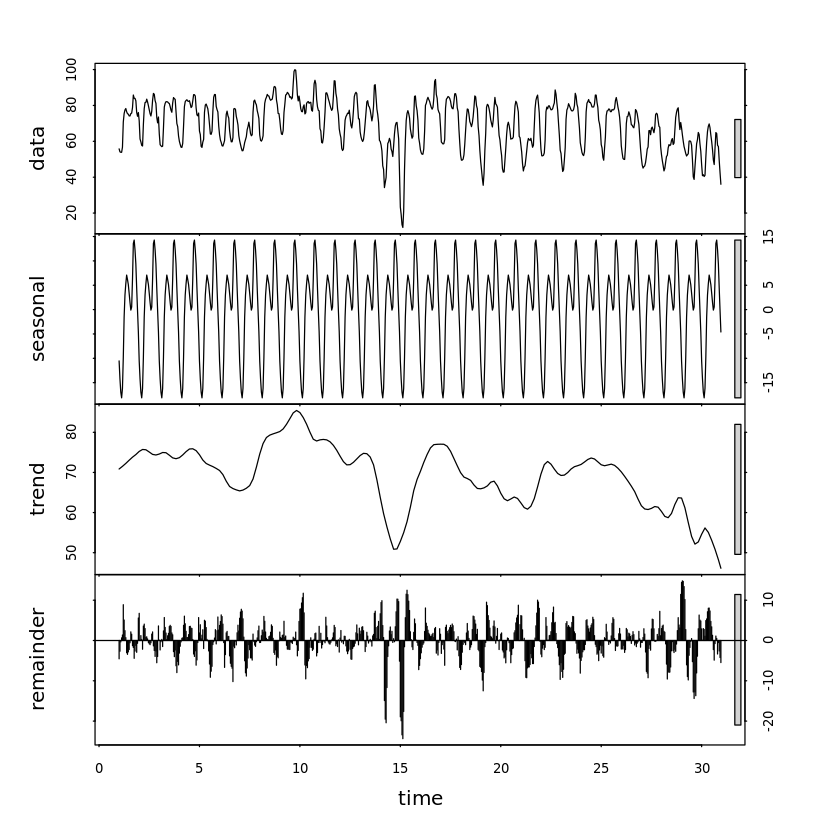

In [101]:
plot(prices_stl)

In [104]:
remainder=prices_stl$time.series[,"remainder"]

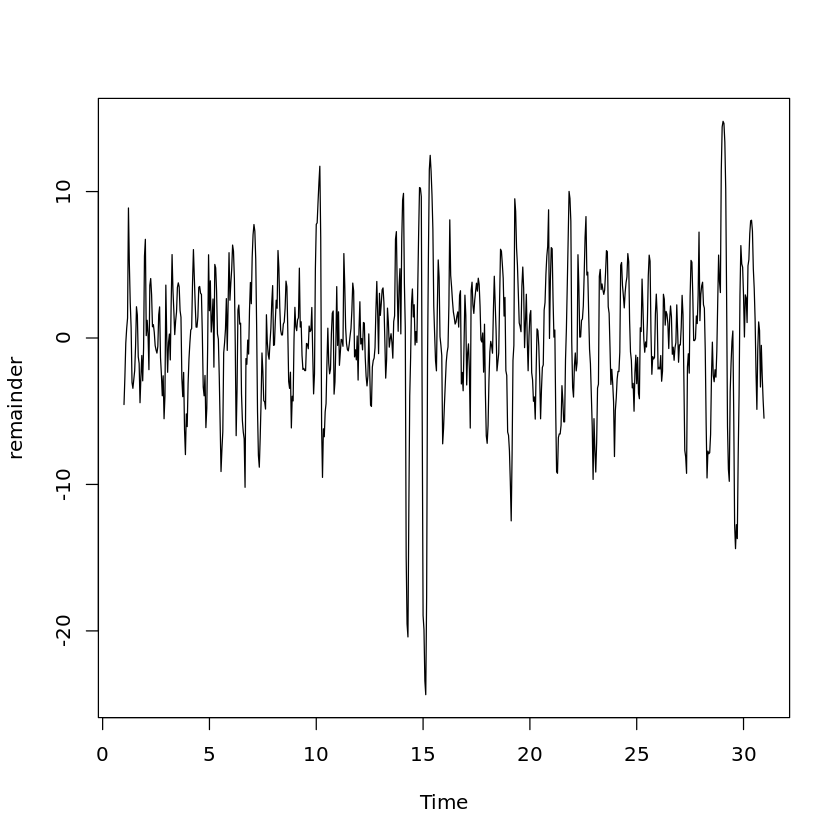

In [105]:
plot(remainder)

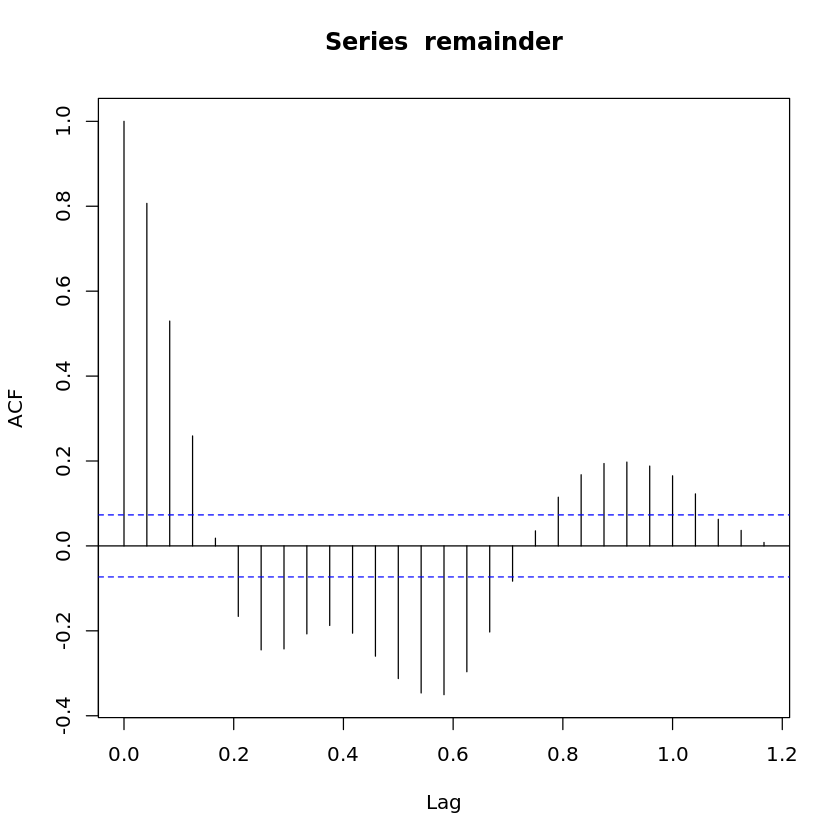

In [106]:
acf(remainder)

In [107]:
ar_remainder<-ar(remainder)
ar_remainder


Call:
ar(x = remainder)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.9357  -0.2315  -0.0007  -0.0523  -0.1818   0.0089  -0.0051   0.0303  
      9       10       11       12       13       14       15       16  
-0.0405  -0.0384  -0.1145  -0.0362  -0.0015  -0.1287   0.0217  -0.0671  
     17       18       19       20       21       22       23       24  
-0.0180   0.0581  -0.1092   0.0061  -0.0347  -0.0114   0.0154   0.0036  
     25       26       27       28  
 0.0108  -0.1796   0.1370  -0.0831  

Order selected 28  sigma^2 estimated as  6.087

In [109]:
ar_remainder$resid

A Time Series:
  [1]            NA            NA            NA            NA            NA
  [6]            NA            NA            NA            NA            NA
 [11]            NA            NA            NA            NA            NA
 [16]            NA            NA            NA            NA            NA
 [21]            NA            NA            NA            NA            NA
 [26]            NA            NA            NA  -1.415730649   5.946607330
 [31]  -0.727957324   0.651299530  -2.615576900   1.126933933   1.473852622
 [36]   0.227134131   0.568550008  -0.387517404   0.435615457   1.942004688
 [41]   1.502045191  -2.760351735  -0.714959131  -0.469369353   0.868172258
 [46]  -2.759946667   0.397765881   4.430632703  -4.845888945  -1.323789489
 [51]   1.599880213  -0.604498098  -0.629176748   3.326047216   1.714158426
 [56]  -1.748422628  -0.875637484  -1.805263670   1.906346241   1.519468014
 [61]   1.894694729   1.159479449  -0.063816380  -0.489540764   0.971193560
 [66]  -2.507697954   0.479936279   1.730812307  -4.033974410  -2.264776631
 [71]   1.007695997  -4.174614764   1.381029084   0.636079485  -1.064056334
 [76]   0.152115828  -0.568065703   2.398214622   1.555644039  -1.303871164
 [81]  -1.142599439  -1.375235699  -0.002830792   0.843365630   2.097274065
 [86]  -0.588165093   0.433014819   0.763346601  -1.208659155  -1.320378752
 [91]   0.378978163   1.075281295  -3.661535433   0.837089100   1.794305677
 [96]   4.418646527  -3.499830066   2.474947292  -2.510825872   2.526320991
[101]   2.785523329  -3.846032484   7.480628372  -0.930248544   0.057202724
[106]  -1.335204031   0.802050789  -1.018290508  -2.253721629  -3.089941651
[111]  -0.010706800  -0.714183692   2.537148520  -1.255341005   0.143593084
[116]   0.388037174  -2.857648675   3.963874675   2.248623849  -2.766996240
[121]   1.036880003   1.030625664   1.465400522   1.896918247  -0.636286543
[126]  -2.650013453  -4.189858942   2.875218668   5.936656043   0.809458381
[131]  -1.283523915   0.240253190  -3.290086565  -0.172210794   0.322104931
[136]  -1.864662698  -5.124451862   5.224669262  -3.679300296   0.100426175
[141]  -2.840260150   1.708801498   1.282789283  -0.587549745   4.341960977
[146]   0.418068533   1.318584215   0.582156601   0.202449254  -2.031801074
[151]  -3.850584473  -2.047787473  -2.664699040   0.688625331   0.073520439
[156]   0.058129781  -2.619032111  -2.604479737  -0.519887981  -1.132377232
[161]   5.490451389  -3.681247775  -3.360575081  -1.667940835  -2.044515202
[166]  -0.028510198   0.208187506   0.537047279  -4.864923276  -0.605315611
[171]   0.915641468   1.120178037  -0.249092824   3.495154574  -0.249217873
[176]  -1.190705670  -0.242339827   0.357169502   0.202937064   1.126156926
[181]   0.197821968   1.793756202   2.173908019   0.705091119  -0.899790734
[186]  -1.871871474   1.762303496   1.480576826  -3.409352003   1.617489219
[191]  -2.046899452   2.672568910   1.824655672  -0.838259032  -0.013118985
[196]   0.951625846   0.850267715   4.077445612  -3.603576985   1.379517893
[201]  -2.773289602  -0.852535756   0.019024719  -0.526787363  -1.186395154
[206]   0.494488651  -0.786257021  -0.934684693   1.996231042  -0.740141774
[211]   0.192725799   1.822724137  -3.351431305  -2.215816042  -0.433807708
[216]   5.639382386   2.341910356   1.026035597   2.784185814   3.279707657
[221]   5.168177184   0.213669773  -7.826148606  -0.053537757   2.780654583
[226]  -0.157955857   0.907280190  -1.878154183   0.530359434   1.857991905
[231]  -1.047132410   1.477689974   0.861375331   1.774731530   1.397468100
[236]   0.097647480  -6.470777945   0.176191936   0.310416806   2.564686537
[241]  -3.701029207   1.771347117  -5.261608040   0.701609690   0.936810791
[246]   0.238440229   0.317792176   5.345503167  -3.288550604  -1.629909781
[251]  -0.502086994  -1.506500522   0.232698553   0.153012624   0.350250125
[256]   0.330649375   0.225307419   1.715280213   0.816257666  -2.917731500
[261]   1.977025282   0.191793036

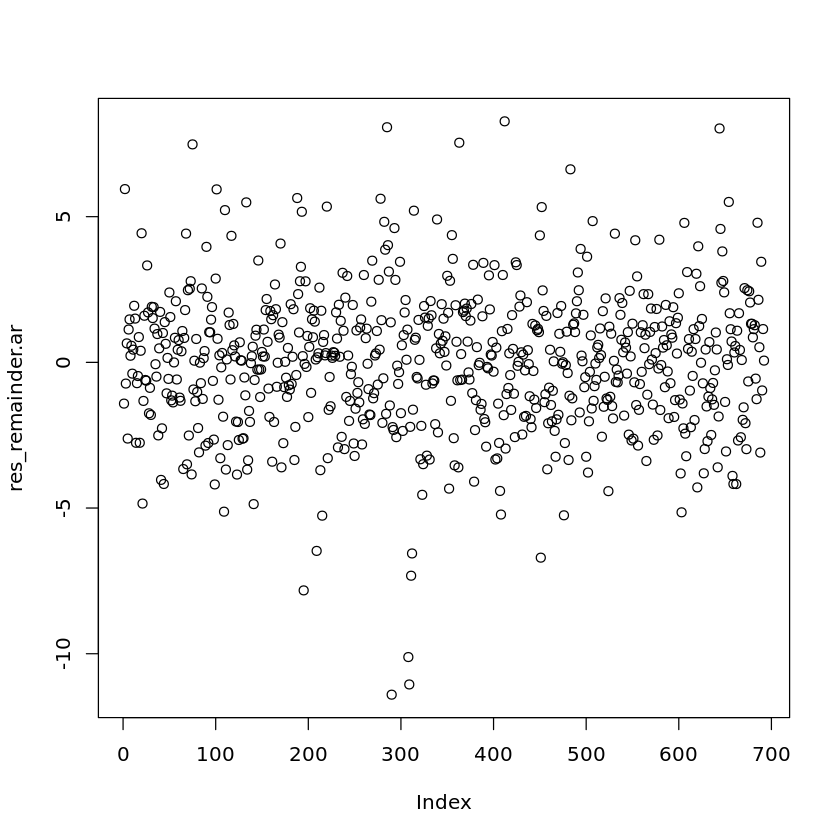

In [110]:
res_remainder.ar <- ar_remainder$resid[-(1:ar_remainder$order)]  #Se eliminan los primeros elementos ya que no tienen residuo
plot(res_remainder.ar)

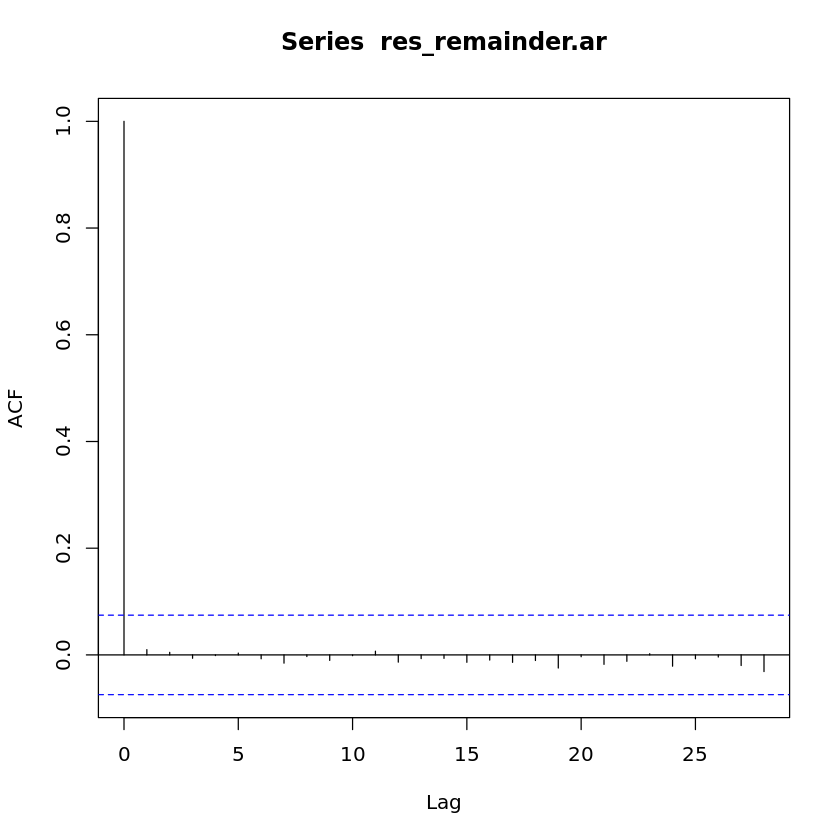

In [111]:
acf(res_remainder.ar)

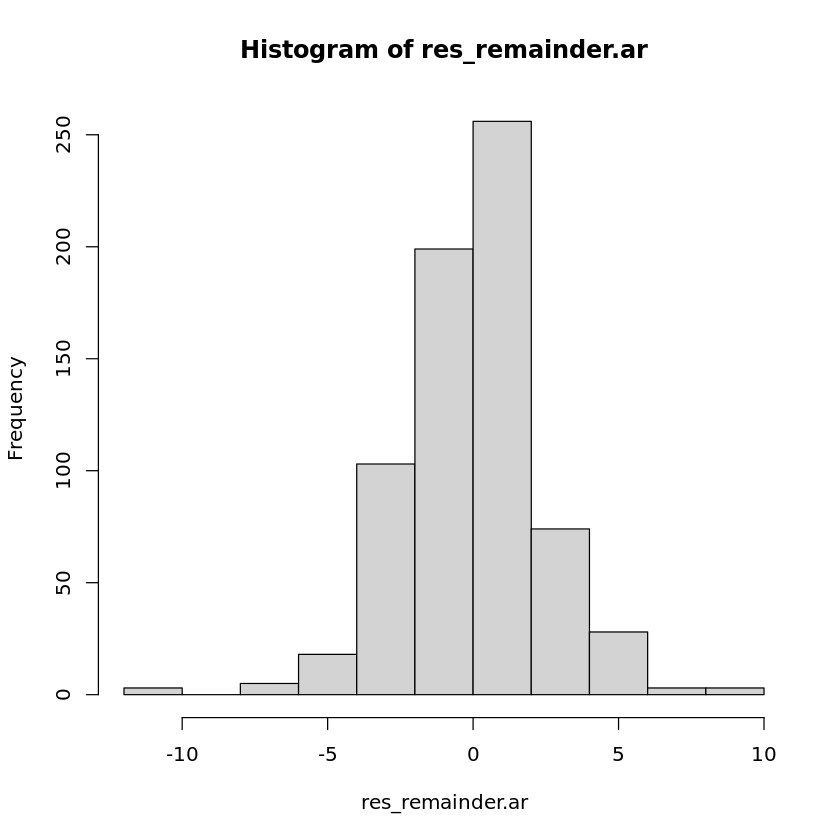

In [112]:
hist(res_remainder.ar)

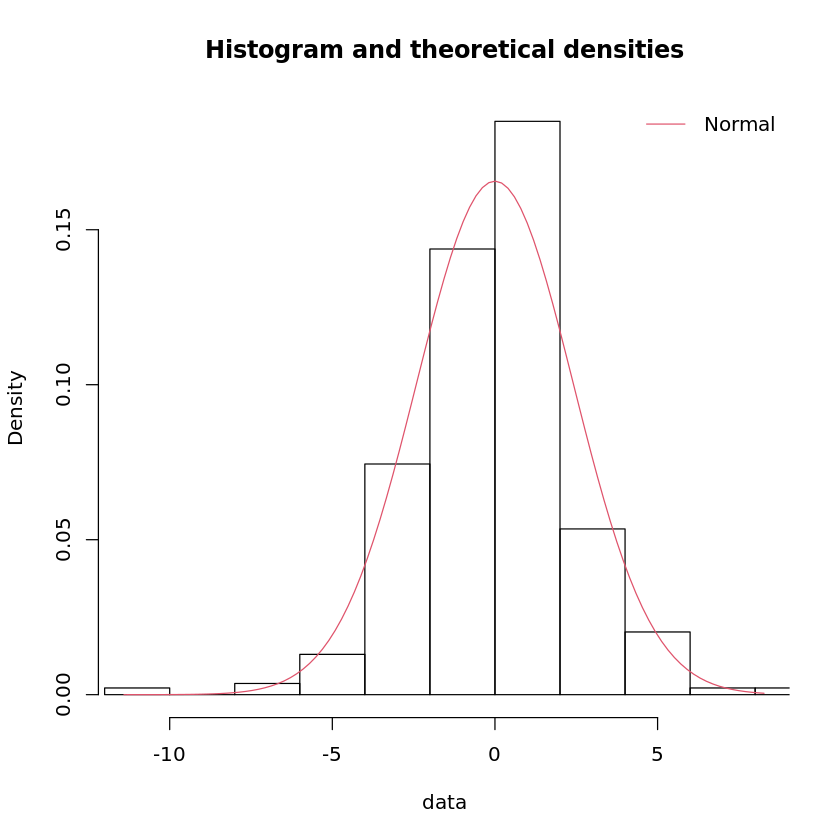

In [117]:
plot.legend <- "Normal"
a_norm <- fitdist(res_remainder.ar, "norm")
denscomp(a_norm,fitcol=2, legendtext=plot.legend)

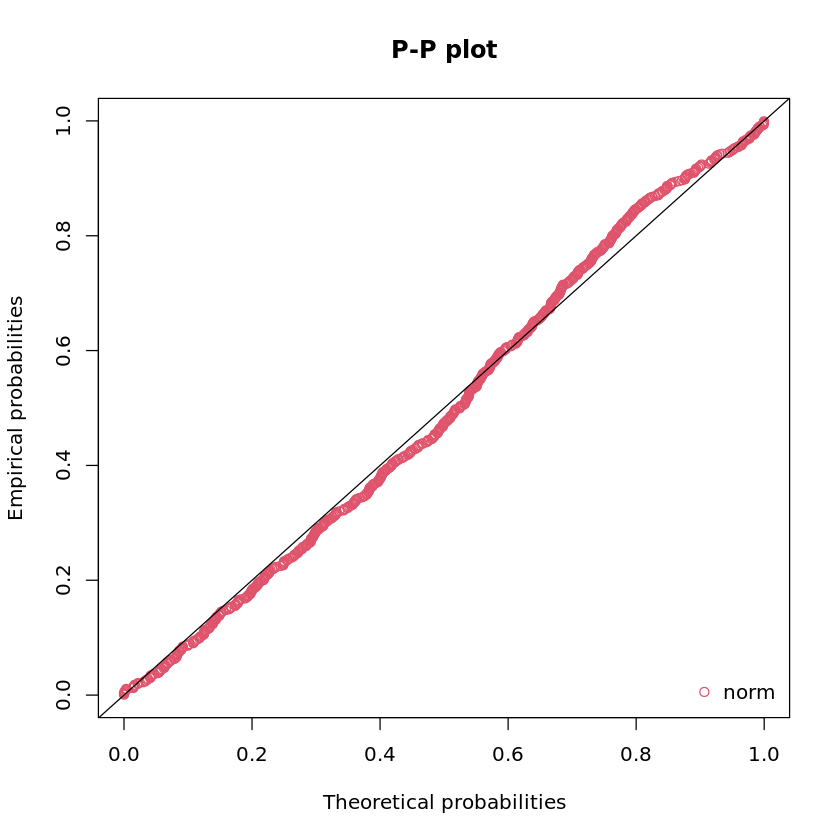

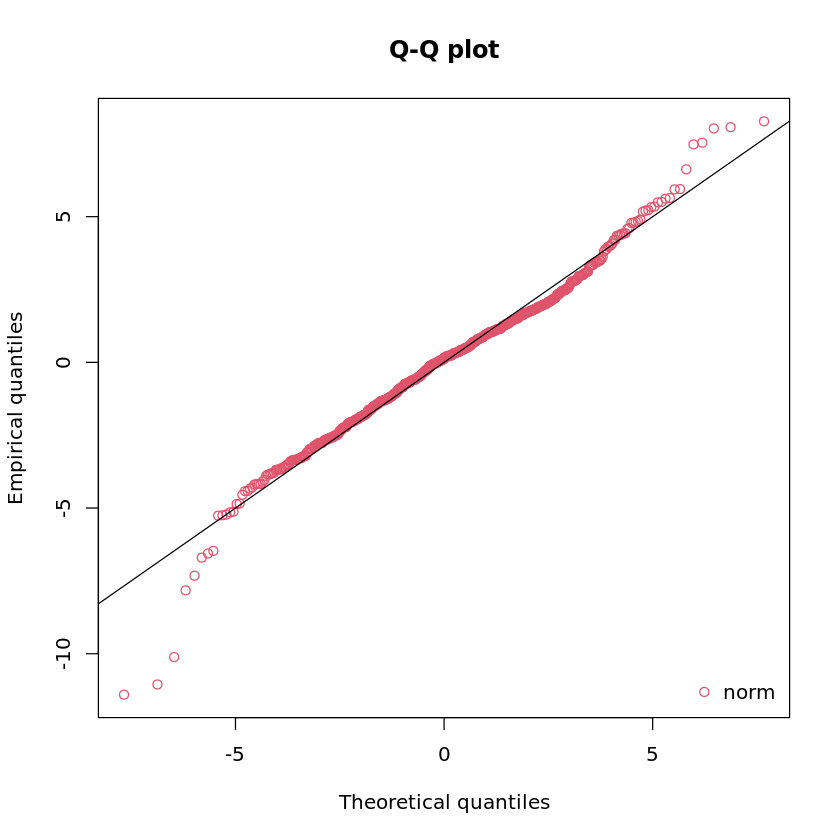

In [118]:
ppcomp(a_norm)
qqcomp(a_norm)

In [119]:
pron_remainder <- predict(ar_remainder,n.ahead=24)   #n.ahead indica cuantos valores queremos predecir
cat(sprintf("Valores pronosticados\n\n"))
pron_remainder$pred
cat(sprintf("\n\n"))
cat(sprintf("Errores estándar\n\n"))
pron_remainder$se

Valores pronosticados



A Time Series:
 [1] -5.49704393 -5.14798772 -3.81688961 -2.31339646 -1.32974124  0.15838983
 [7]  1.56450814  1.38003973  1.44024688  1.60111129  1.78436597  2.02888410
[13]  2.08841477  2.08144664  2.21106647  2.03702765  2.17404882  2.17232483
[19]  1.23402488  0.60141867  0.03158739 -0.06890537 -1.29312997 -1.26839137



Errores estándar



A Time Series:
 [1] 2.467137 3.378827 3.733911 3.853103 3.872930 3.896093 4.014801 4.173405
 [9] 4.281962 4.340558 4.364480 4.386471 4.414309 4.441384 4.497388 4.559167
[17] 4.607143 4.627477 4.627814 4.640241 4.671255 4.712653 4.751877 4.784148

$pred
Time Series:
Start = c(31, 1) 
End = c(31, 24) 
Frequency = 24 
 [1] -5.49704393 -5.14798772 -3.81688961 -2.31339646 -1.32974124  0.15838983
 [7]  1.56450814  1.38003973  1.44024688  1.60111129  1.78436597  2.02888410
[13]  2.08841477  2.08144664  2.21106647  2.03702765  2.17404882  2.17232483
[19]  1.23402488  0.60141867  0.03158739 -0.06890537 -1.29312997 -1.26839137

$se
Time Series:
Start = c(31, 1) 
End = c(31, 24) 
Frequency = 24 
 [1] 2.467137 3.378827 3.733911 3.853103 3.872930 3.896093 4.014801 4.173405
 [9] 4.281962 4.340558 4.364480 4.386471 4.414309 4.441384 4.497388 4.559167
[17] 4.607143 4.627477 4.627814 4.640241 4.671255 4.712653 4.751877 4.784148

In [ ]:
install.packages('forecast')
library(forecast)
types <- c("pron.Point.Forecast"="pronóstico","pron.Lo.95"="inf","pron.Hi.95"="sup")
horas <- data.frame(hora=0:23)

pron_remainder_conf <- forecast(ar_remainder,24,level=95)  #Level es el nivel de confianza (95%)

pron.remainder.df <- data.frame(hora=horas,pron=pron_remainder_conf)
#head(pron.ar.df)
pron.ar2 <- pron.ar.df %>% tidyr::gather("type", "precios", 2:4) 
#head(pron.ar2)
plot.pronostico <- ggplot(pron.ar2,aes(hora,precios,group=type,color=types[type]))+
                     geom_line()+
                     labs(x = 'Hora', y = 'Precios',
                          title='Pronóstico 95% para el día 31/7/2018',
                          color="Precios:")+
                     mytheme
                 
plot.pronostico

In [ ]:
install.packages('forecast')
library(forecast)
types <- c("pron.Point.Forecast"="pronóstico","pron.Lo.95"="inf","pron.Hi.95"="sup", "precio"="real", "sim"="sim")
horas <- data.frame(hora=0:23)

pron_ar_conf <- forecast(armod7,24,level=95)  #Level es el nivel de confianza (95%)

pron.ar.df <- data.frame(hora=horas,pron=pron_ar_conf)
#head(pron.ar.df)
pron.ar2 <- pron.ar.df %>% tidyr::gather("type", "precios", 2:4) 
#head(pron.ar2)
plot.pronostico <- ggplot(pron.ar2,aes(hora,precios,group=type,color=types[type]))+
                     geom_line()+
                     labs(x = 'Hora', y = 'Precios',
                          title='Pronóstico 95% para el día 31/7/2018',
                          color="Precios:")+
                     mytheme
                 
plot.pronostico

### Hicimos un pronóstico via regresión

In [5]:
mod7<-with(data7,lm(formula=precio ~ hora+eol+dem))
summary(mod7)


Call:
lm(formula = precio ~ hora + eol + dem)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.5365  -8.1625   0.0913   7.4602  27.5398 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.564e+01  1.290e+00  27.635  < 2e-16 ***
hora         2.059e-01  2.887e-02   7.132 1.25e-12 ***
eol         -1.636e-03  7.581e-05 -21.583  < 2e-16 ***
dem          1.002e-03  4.276e-05  23.431  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.747 on 2876 degrees of freedom
Multiple R-squared:  0.3238,	Adjusted R-squared:  0.3231 
F-statistic: 459.1 on 3 and 2876 DF,  p-value: < 2.2e-16


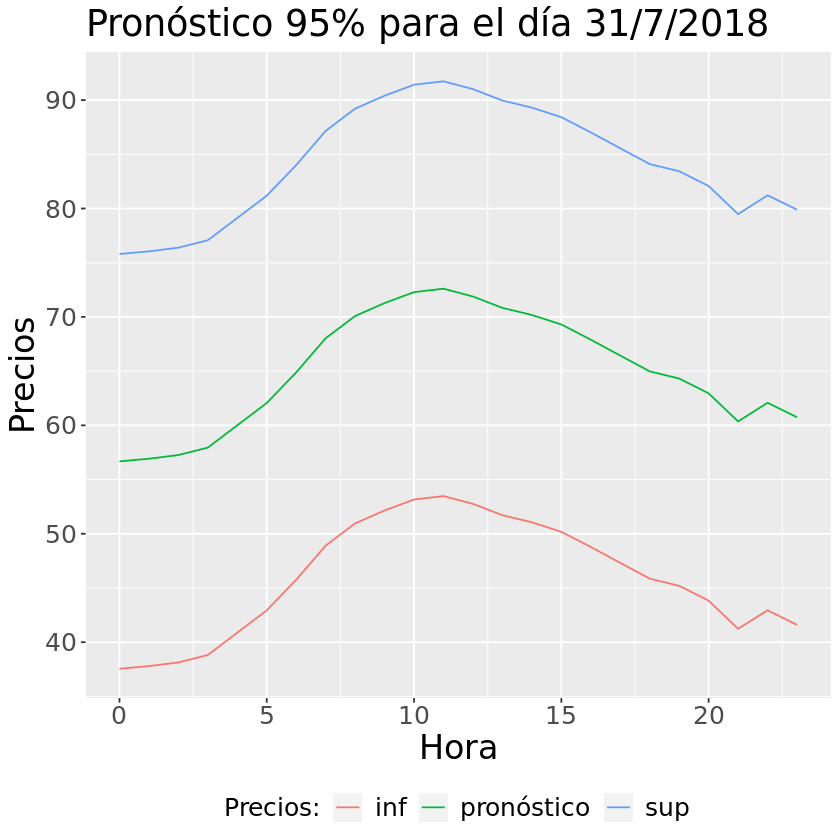

In [6]:
pron_horario <- predict(mod7,newdata=test7,level=0.95,int="p")   #Añade intervalo de predicción
#head(fore_hour)


#Arma el dataframe con los datos pronosticados
types <- c("precio"="real", "fit"="pronóstico","lwr"="inf","upr"="sup")
horas <- data.frame(hora=0:23)
pron.df <- cbind(horas,pron_horario)
#head(pron.df)
pron <- pron.df %>% tidyr::gather("type", "precios", 2:4) 
#head(pron)
plot.pronostico <- ggplot(pron,aes(hora,precios,group=type,color=types[type]))+
                     geom_line()+
                     labs(x = 'Hora', y = 'Precios',
                          title='Pronóstico 95% para el día 31/7/2018',
                          color="Precios:")+
                      mytheme
                 
plot.pronostico

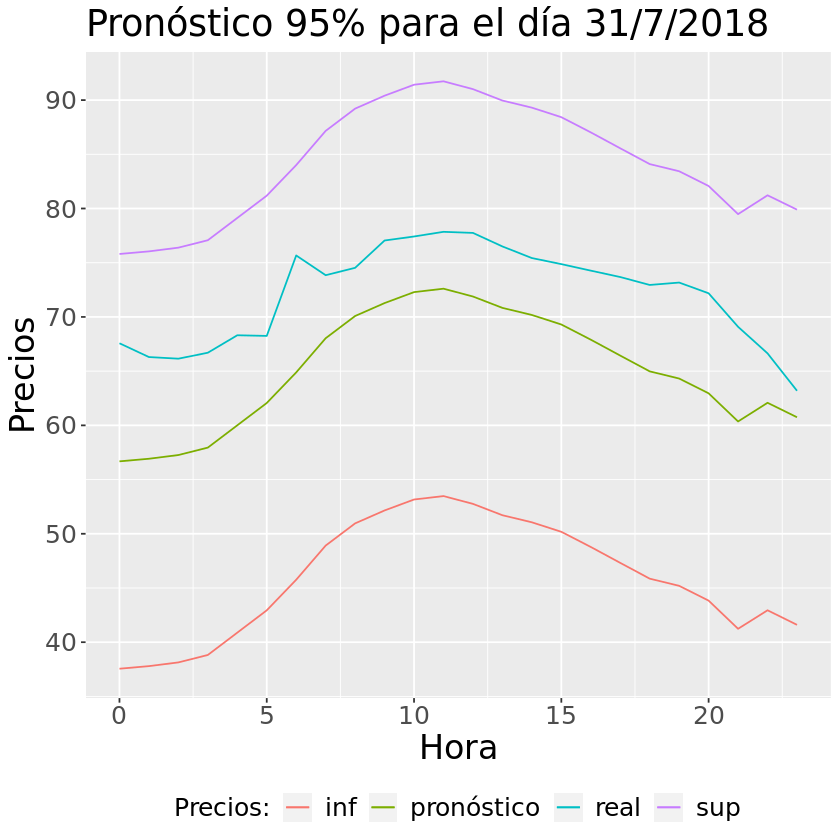

In [7]:
real.df <- cbind(horas,price7_test)
#head(real.df)
real <- real.df %>% tidyr::gather("type", "precios", 2) 
#head(real)
                 
plot.pronostico+geom_line(data=real,aes(hora,precios,color=types[type]))




## ¿Cómo utilizar la regresión para simular el precio?

### Hemos visto que podemos escribir $Y= a + bX_0 + \epsilon$, 
###  donde $\epsilon$ tiene distribución Normal con media 0 y desviación estandar=D.E. de los residuos.

### Luego, para simular el precio, basta "enchufar" los valores del las variables predictoras en la fórmula, y generar la muestra Normal correspondiente.

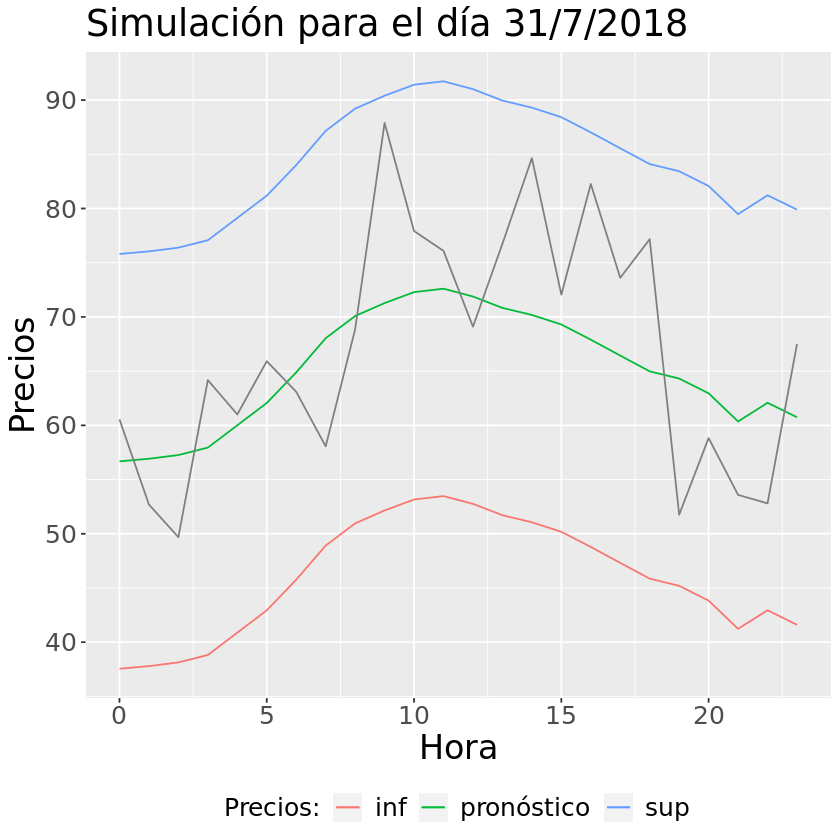

In [8]:
res7<-resid(mod7)

sim.df <- cbind(horas,sim=predict(mod7,newdata=test7) + rnorm(24,0,sd(res7)))
#head(sim.df)
sim <- sim.df %>% tidyr::gather("type", "precios", 2) 
#head(sim)
                
plot.pronostico+geom_line(data=sim,aes(hora,precios,color=types[type]))+
                         labs(title='Simulación para el día 31/7/2018')
                        
              

## ¿Podemos mejorar aún más el pronóstico y simulación?

### Veamos la evolución del precio durante los primeros 4 días de julio

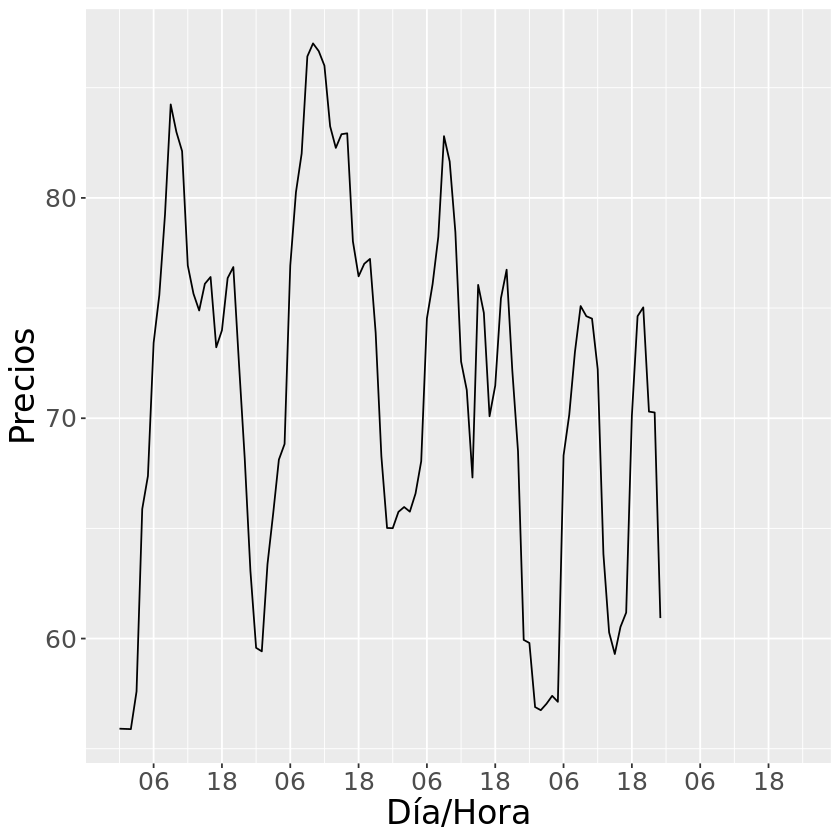

In [10]:
precio_hora <- data7[anio==2015 & dia<=5, .(time,precio)]
plot.hora <- precio_hora
plot.hora[97:120,2] <- NA  #esconde el 5to dia
plotfig <- ggplot(plot.hora,aes(time, precio))+
             geom_line(na.rm=TRUE)+
             scale_x_datetime(date_breaks="12 hours",date_labels = "%H")+
             mytheme+
             labs(x = 'Día/Hora', y = 'Precios')

plotfig

### ¿Cómo sigue la serie?

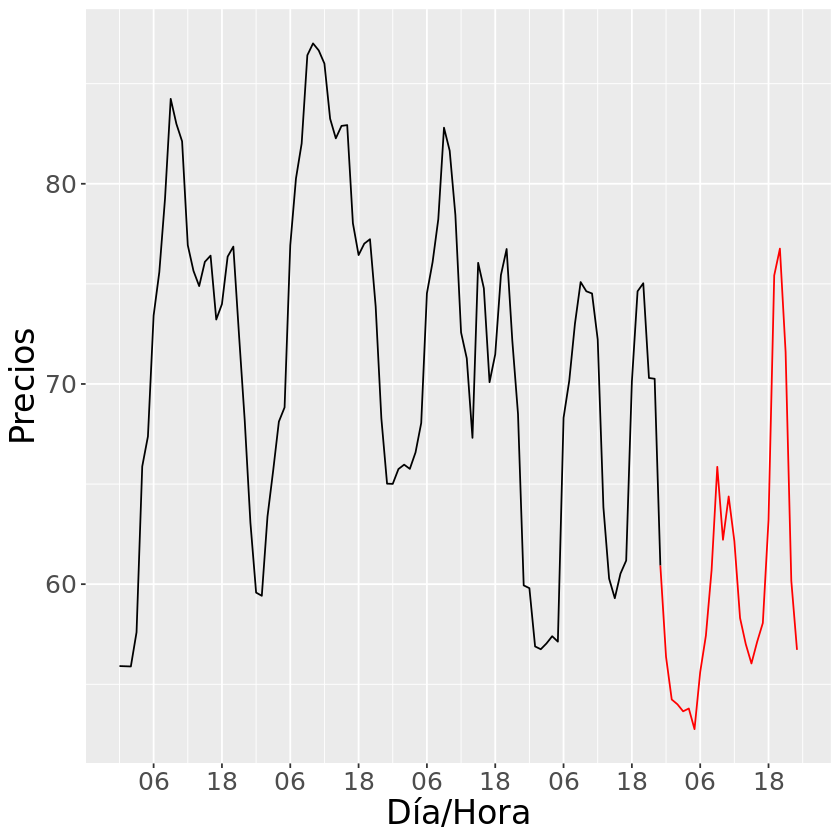

In [11]:
plot.hora <- precio_hora
plot.hora[-(96:120),2] <- NA  #muestra solo el 5to dia
plotfig+geom_line(data=plot.hora,na.rm=TRUE,color="red")

### El punto es que claramente los precios tienen un comportamiento *estacional*.

### Eso sugiere chequear la dependencia del precio respecto de precios anteriores.

### La función de *auto-correlación* hace justamente eso!

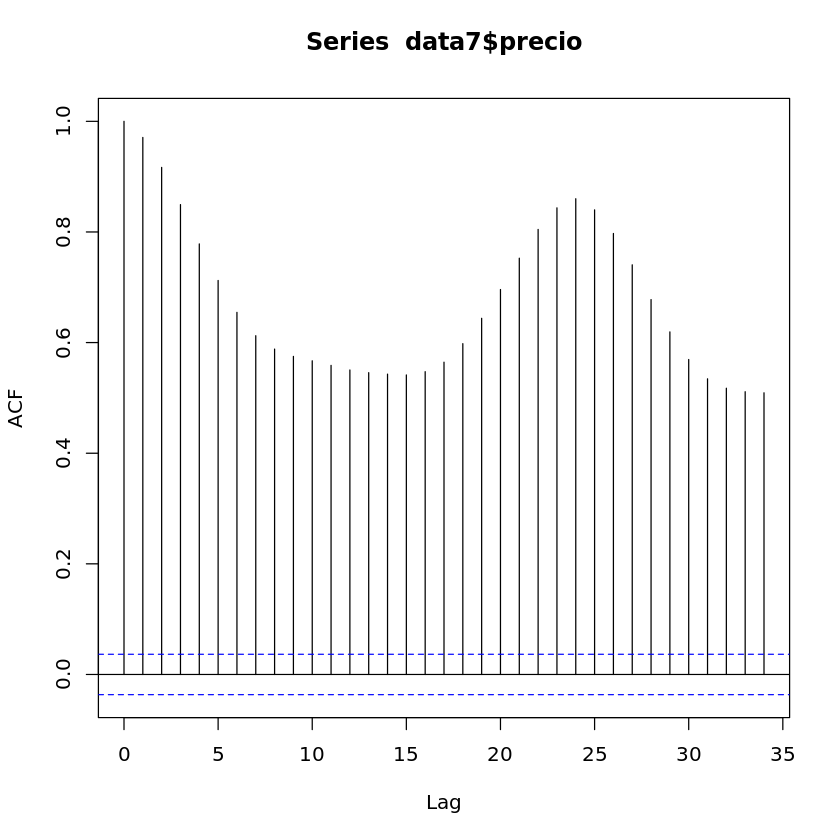

In [12]:
acf(data7$precio)

### Vemos que el precio es una *serie temporal*. Hay muchos modelos para series temporales.

### Por ejemplo, un modelo *auto-regresivo de orden $p$* (AR($p$)) se define como 

### $x_t - \mu = a_1 (x_{t-1} - \mu) +\ldots + a_p (x_{t-p} - \mu) + \epsilon_t$

### donde $\mu$  es la media del proceso y $\epsilon_t$ es el residuo en el periodo $t$.

### Calibremos un modelo AR($p$) a los precios de julio/2018.

In [77]:
price7_train

[1] 65.85 63.24 63.07 62.85 61.56 58.28 59.63 60.83 60.11 61.58 61.38 61.47
 [13] 61.39 56.57 55.53 55.62 55.92 57.98 61.98 66.99 68.85 68.95 63.50 59.47
 [25] 57.05 57.06 57.20 59.58 63.49 64.00 68.97 69.26 70.43 72.80 74.12 74.31
 [37] 73.15 71.60 70.85 70.74 70.75 69.38 69.34 70.38 69.99 69.43 65.58 63.50
 [49] 62.11 60.56 60.50 62.18 63.79 64.45 68.47 69.96 69.88 72.21 71.91 71.42
 [61] 70.82 70.06 69.74 69.77 70.77 69.02 69.46 69.07 71.25 67.58 66.00 63.75
 [73] 63.44 63.48 63.50 64.17 64.45 63.96 69.85 73.00 70.56 73.50 72.77 71.30
 [85] 71.06 69.53 68.49 68.77 68.75 67.38 66.81 65.39 68.52 65.15 60.79 56.57
 [97] 56.41 56.76 56.74 57.16 59.93 62.49 67.69 68.68 69.09 71.68 71.34 70.89
[109] 71.13 70.93 70.24 70.02 69.93 68.14 67.83 68.50 69.36 68.40 65.59 62.67
[121] 60.88 59.79 59.26 61.57 64.43 64.12 67.89 69.09 69.00 71.68 72.22 72.48
[133] 71.59 70.41 70.02 69.88 69.51 68.13 68.26 68.38 68.45 67.22 65.68 64.52
[145] 64.82 65.20 65.13 65.24 64.70 64.23 64.66 65.71 65.63 66.00 65.99 66.72
[157] 66.49 65.18 64.65 64.51 64.38 64.59 65.47 66.33 67.05 65.16 63.45 61.82
[169] 59.90 57.92 57.28 57.62 57.42 57.28 59.34 59.15 62.82 65.98 66.48 66.96
[181] 67.06 65.99 64.95 65.84 64.98 65.18 63.39 67.01 67.68 66.38 65.40 62.56
[193] 57.68 56.47 56.20 56.71 62.06 65.27 68.70 68.69 69.91 72.72 73.10 73.31
[205] 73.00 71.81 71.36 71.15 70.45 68.93 68.60 68.97 69.59 68.38 64.21 60.26
[217] 57.31 55.78 55.32 56.16 60.83 63.81 67.84 69.19 69.41 72.22 72.59 73.39
[229] 72.61 71.77 71.41 70.91 69.91 68.37 68.21 68.78 69.31 67.97 64.54 58.54
[241] 56.97 56.47 55.63 55.99 60.21 64.62 69.31 69.79 70.09 72.78 74.03 74.68
[253] 73.74 72.06 71.42 70.79 70.24 68.63 69.20 70.25 70.88 68.51 64.97 64.17
[265] 61.00 59.95 59.88 60.72 64.63 66.60 71.27 73.09 72.34 75.15 76.35 76.84
[277] 76.13 74.47 74.03 73.42 72.56 70.28 70.98 71.24 71.00 68.89 65.71 64.03
[289] 61.25 59.77 59.92 61.77 64.63 66.40 71.31 71.92 71.75 74.38 74.94 75.26
[301] 73.73 72.90 72.52 72.56 71.52 70.10 70.86 71.52 71.28 70.12 67.60 66.75
[313] 65.98 65.47 65.21 65.46 64.69 64.83 66.85 67.34 67.95 68.65 68.58 68.25
[325] 68.05 66.52 64.86 63.85 63.57 65.00 67.73 69.00 69.38 68.60 67.63 66.53
[337] 65.61 65.66 63.26 63.18 62.92 63.17 67.25 67.89 66.84 68.29 68.08 68.68
[349] 67.96 63.45 59.89 57.48 57.00 59.64 61.02 64.04 68.56 63.99 64.09 57.50
[361] 55.24 55.16 55.26 55.23 58.09 62.44 68.64 69.97 70.21 72.20 72.74 73.21
[373] 73.07 71.86 72.07 72.30 71.96 70.49 71.24 72.65 73.13 70.92 66.29 64.46
[385] 60.73 60.64 59.60 60.23 64.46 66.55 70.83 71.49 71.65 74.01 74.95 75.53
[397] 74.41 73.32 72.88 72.48 71.81 69.83 70.05 70.32 70.35 66.85 63.96 60.23
[409] 58.25 58.70 58.05 58.61 64.40 67.51 70.89 72.19 72.05 74.63 74.60 74.93
[421] 74.06 73.00 72.87 72.69 72.82 70.31 70.87 72.35 73.50 71.84 68.99 67.08
[433] 65.19 62.87 63.02 64.50 66.75 67.18 72.40 73.76 73.75 76.01 76.12 75.89
[445] 75.21 73.11 72.32 71.82 71.56 70.09 70.01 70.09 70.32 69.20 65.43 61.53
[457] 60.31 59.73 59.54 60.74 65.06 66.31 71.71 72.67 72.87 74.82 75.15 75.44
[469] 73.41 72.04 71.05 69.23 66.14 65.33 67.26 69.30 69.04 67.83 65.78 63.69
[481] 61.49 61.70 61.64 61.86 63.63 63.89 66.23 68.50 69.44 69.66 69.72 70.06
[493] 69.57 67.99 66.80 65.56 64.44 65.78 67.59 68.37 69.70 68.76 68.91 67.55
[505] 66.37 64.42 62.92 62.97 61.96 60.07 63.50 63.53 62.59 63.36 66.10 67.52
[517] 67.76 66.08 64.92 63.38 62.38 62.83 63.87 67.34 69.19 67.34 66.39 62.72
[529] 60.13 58.80 58.35 58.98 62.46 66.67 71.47 72.28 72.21 74.06 74.84 75.07
[541] 74.53 73.07 72.92 71.62 71.51 70.46 71.55 72.42 71.66 71.94 67.90 66.06
[553] 64.09 61.56 61.67 62.86 65.49 66.67 71.75 73.45 73.86 75.33 77.30 77.46
[565] 75.79 76.79 74.66 74.92 74.01 71.72 70.76 71.76 70.88 69.11 67.36 65.68
[577] 63.35 61.28 60.91 61.55 65.58 67.22 71.09 72.82 73.42 75.84 77.07 76.79
[589] 76.09 74.60 74.43 74.42 73.42 72.95 71.63 72.64 72.44 71.09 69.27 67.72
[601] 66.72 65.32 65.40 66.14 67.71 68.00 72.63 73.78 74.37 77.01 77.73 78.08
[613] 76.79 75.37 75.02 

In [14]:
price7_train <- data7[anio==2018,precio]
armod7<-ar(price7_train)
armod7


Call:
ar(x = price7_train)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.1469  -0.1127  -0.0354  -0.1449   0.0646  -0.1034   0.0745   0.0449  
      9       10       11       12       13       14       15       16  
 0.0761  -0.0791  -0.0433  -0.0783   0.1014   0.0258  -0.0592   0.0115  
     17       18       19       20       21       22       23       24  
-0.0554   0.0411   0.0661  -0.0993   0.0790  -0.0146   0.0527   0.3399  
     25  
-0.3884  

Order selected 25  sigma^2 estimated as  1.711

### Analicemos los residuos. Antes que nada, es importante averiguar si el comportamiento de los residuos varía al largo del tiempo.

In [108]:
armod7$resid

[1]           NA           NA           NA           NA           NA
  [6]           NA           NA           NA           NA           NA
 [11]           NA           NA           NA           NA           NA
 [16]           NA           NA           NA           NA           NA
 [21]           NA           NA           NA           NA           NA
 [26]  1.353398525 -0.340651481  1.329601067  1.858036715 -0.381592799
 [31]  3.100917419 -0.615565426  1.849482615  1.516869981  1.573453249
 [36]  0.139528751 -0.079168335  1.074149512  0.475867209  0.336000517
 [41]  0.208564907 -2.273821642 -1.625097661 -0.943829194 -0.936444275
 [46]  0.708555502 -0.761710269  0.884639839  0.501959178 -1.158013269
 [51]  0.321789410  0.231959508 -1.207012217 -1.194432528  1.183204765
 [56]  0.650556440 -1.145950342  1.156626939 -1.019392514 -0.459670378
 [61]  0.408581051  0.213677377  0.125303276  0.146535585  0.892158624
 [66] -1.334568697  0.596120918 -0.582381737  2.834167642 -3.053779089
 [71]  1.029307279 -0.715552754  1.454179352  0.376439035  0.468861801
 [76] -0.689177889 -1.192148176 -1.823259831  4.128911914  1.776477244
 [81] -3.125259857  1.711346046 -0.739831593 -0.824226432  0.896112714
 [86] -0.086393933 -0.777621644 -0.092049567 -0.364479130 -0.948306219
 [91] -0.091065223 -1.069029838  2.518356019 -1.863054884 -3.024305229
 [96] -2.623247017  1.386198366 -0.449661556 -0.225108954 -0.886644745
[101]  0.773809662  0.363526324  1.312425487 -1.475967370  1.120731856
[106]  0.676941002 -0.700428123  0.157321473  1.045928463  0.832021985
[111] -0.714479645 -0.939939044  0.369495767 -1.034449514  0.577137750
[116]  1.251634337  0.032508890  0.994660113 -0.407539457 -0.443825427
[121] -0.563167009 -0.669612976  0.046634520  1.574901460  0.167338147
[126] -3.237325401  0.720577210  0.121724089 -0.505458216  1.551172926
[131]  0.491446089  0.113238904 -0.907802847 -0.744795252  0.234097536
[136]  0.315746186 -0.027461546 -0.744632153  0.432574252 -0.139887916
[141] -0.084559879 -0.061054741  0.206616379  0.635294931  1.719794552
[146]  0.621488571  0.296685265 -1.196674806 -2.224577677 -0.833630984
[151] -1.179847522  0.597898748 -0.622442108 -1.331430081 -0.920213813
[156]  0.375608764 -0.018786076 -0.871182870 -0.415786633 -0.198877271
[161] -0.255087516  0.427239591  0.534594445  0.266596269  0.134894028
[166] -1.720768059 -0.819715646 -0.730955398 -1.632440146 -2.175441110
[171] -0.673200673 -0.288250018 -1.122534142 -1.124532635  0.880480838
[176] -1.681923136  2.852710593  1.544804085 -0.691937010 -0.721088449
[181] -0.031645915 -0.714924898 -0.640705123  1.097946983 -1.160345355
[186] -0.747722042 -2.907978635  3.078635853 -0.146693731 -0.551810081
[191] -0.542957417 -1.393725372 -3.594732453  0.725274940  0.696836167
[196] -0.051409475  3.892729750  1.016374921  0.424823049 -1.405649127
[201] -0.160607341  1.552249066  0.521304665  0.094514450 -0.228656432
[206] -0.481875058 -0.130258378  0.101141583  0.386627080 -1.432616381
[211]  0.393806032 -0.866124724  0.570791564  0.160426365 -2.876665036
[216] -1.673942776  0.348378122 -0.260271257  0.106615227 -0.339858594
[221]  0.703728221 -0.818246753  0.703096992 -0.018762631 -0.633316076
[226]  1.508710232  0.032674353  0.733850505 -0.536579733 -0.290859932
[231] -0.283315586 -0.281352280 -0.246559516 -0.485033171  0.136510323
[236]  0.523176876  0.385407241  0.006400099 -0.866314302 -3.388664764
[241]  1.309034014  0.754843130 -0.347035566 -1.136528656  0.657522754
[246]  0.712115211  0.961860787 -1.372472357 -0.085033424  1.389979867
[251]  0.921885836  0.237224303 -0.164888343 -1.081883982 -0.582345577
[256] -0.216642997  0.520148238 -0.436534706  1.024611901  0.311386084
[261]  0.506223560 -0.912218994 -0.604995617  2.854901251 -1.594743777
[266] -0.114790806  0.812040149  0.086243523  0.547129793 -1.565574528
[271]  1.643863654  0.651203637 -1.428534714  1.675272551  0.939233879
[276]  0.758819939  0.104996179 -0.524089551  0.365782457  0.087564682
[281]  0.418986460 -1.0461

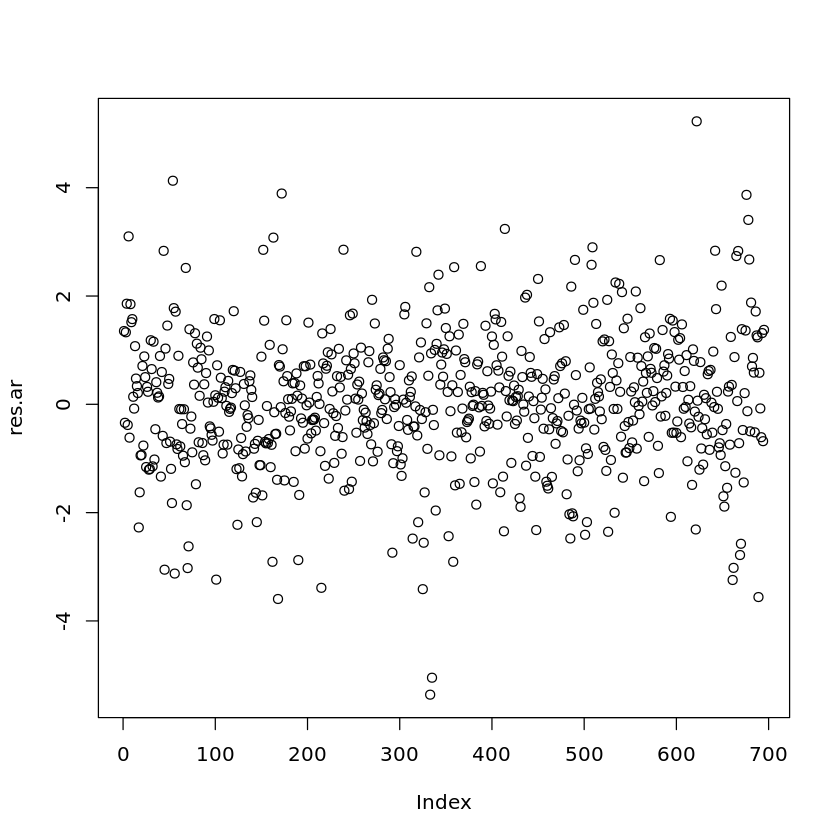

In [16]:
res.ar <- armod7$resid[-(1:armod7$order)]  #Se eliminan los primeros elementos ya que no tienen residuo
plot(res.ar)

### Se nota un comportamiento constante al largo del tiempo.

### También podemos chequear la auto-correlación de los residuos:

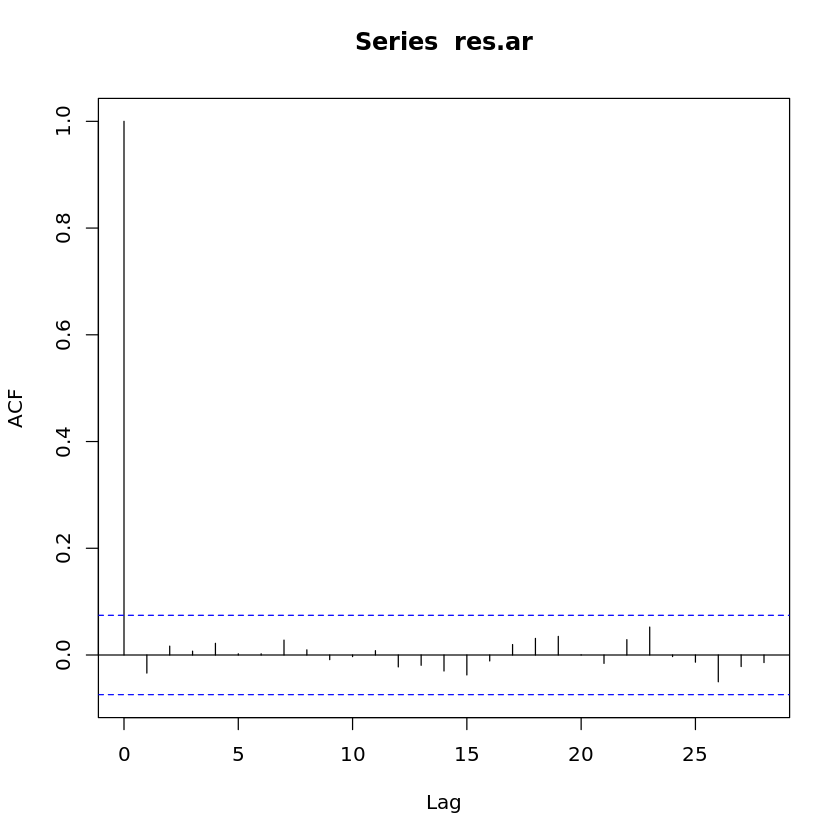

In [17]:
acf(res.ar)

### Los residuos no son correlacionados segun el análisis.

### Veamos como se distribuyen los residuos.

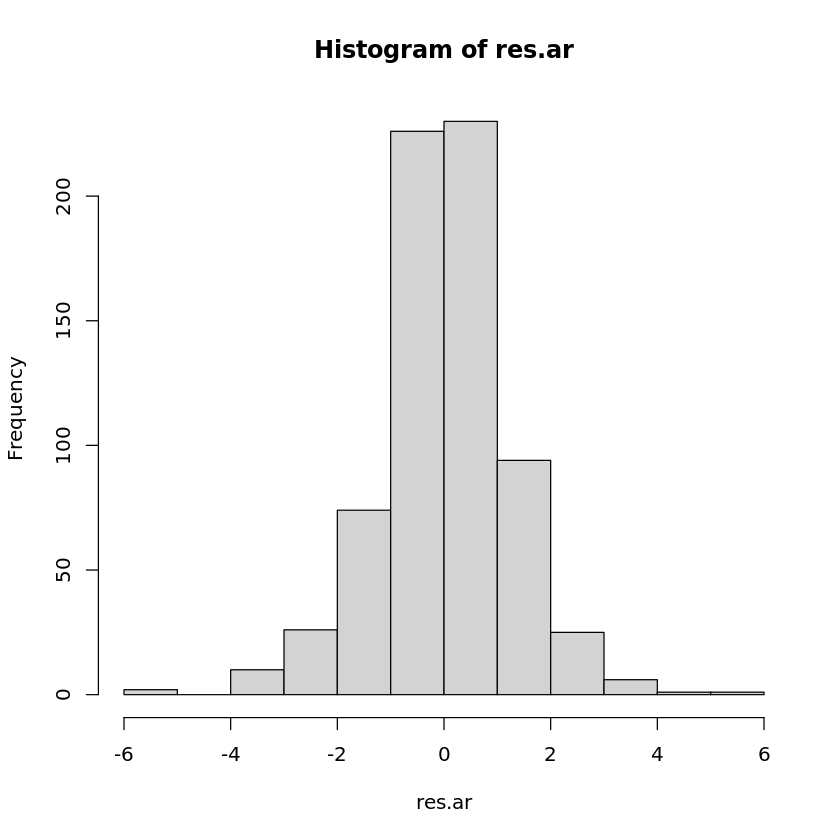

In [18]:
hist(res.ar)

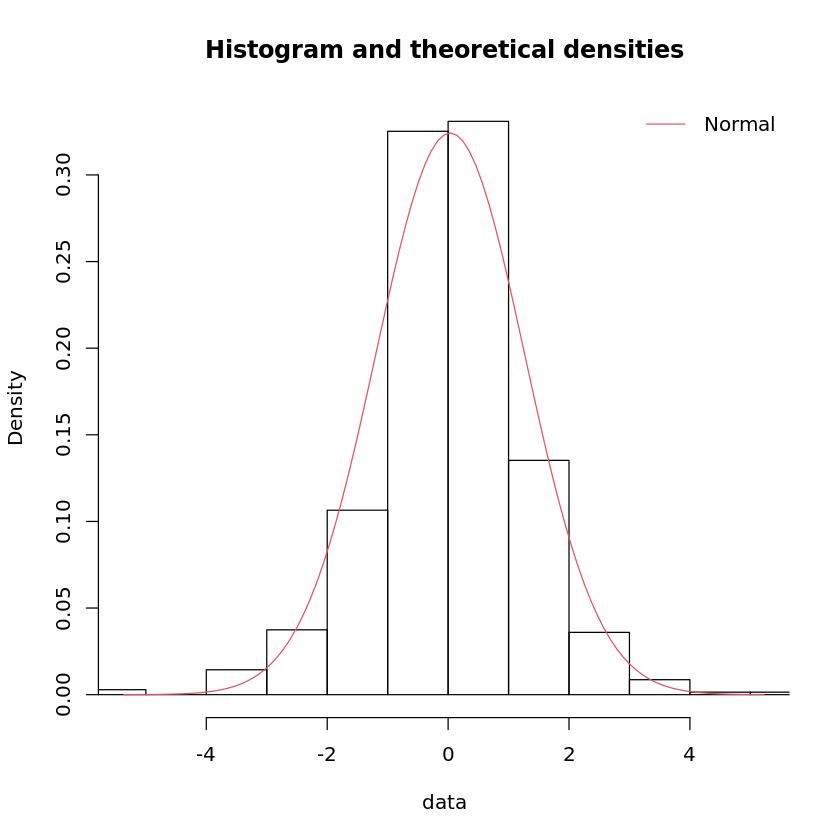

In [20]:
plot.legend <- "Normal"
a_norm <- fitdist(res.ar, "norm")
denscomp(a_norm,fitcol=2, legendtext=plot.legend)

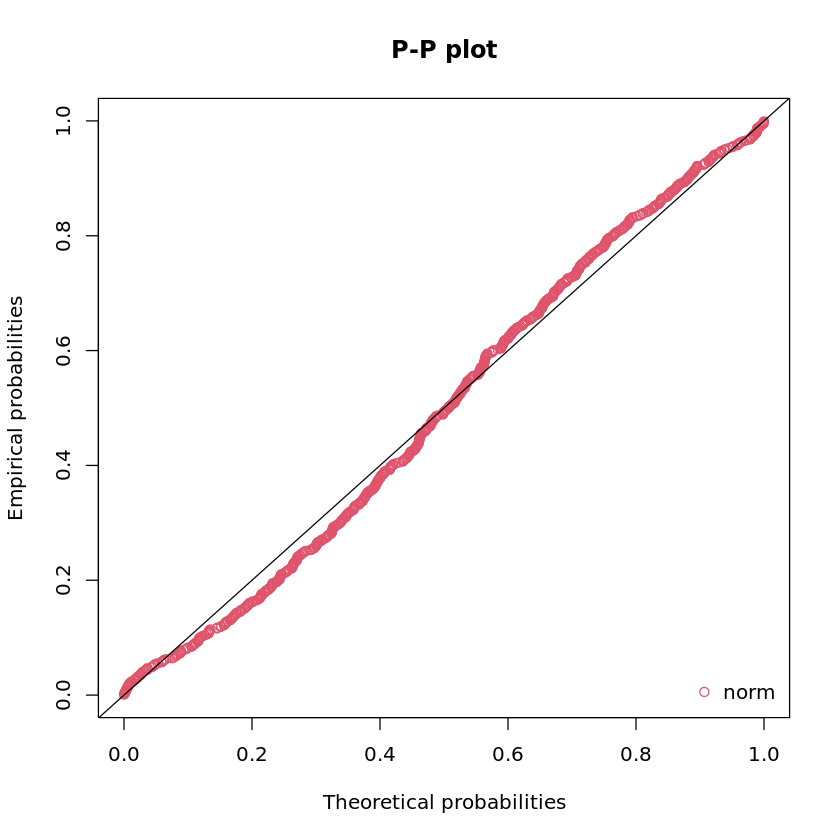

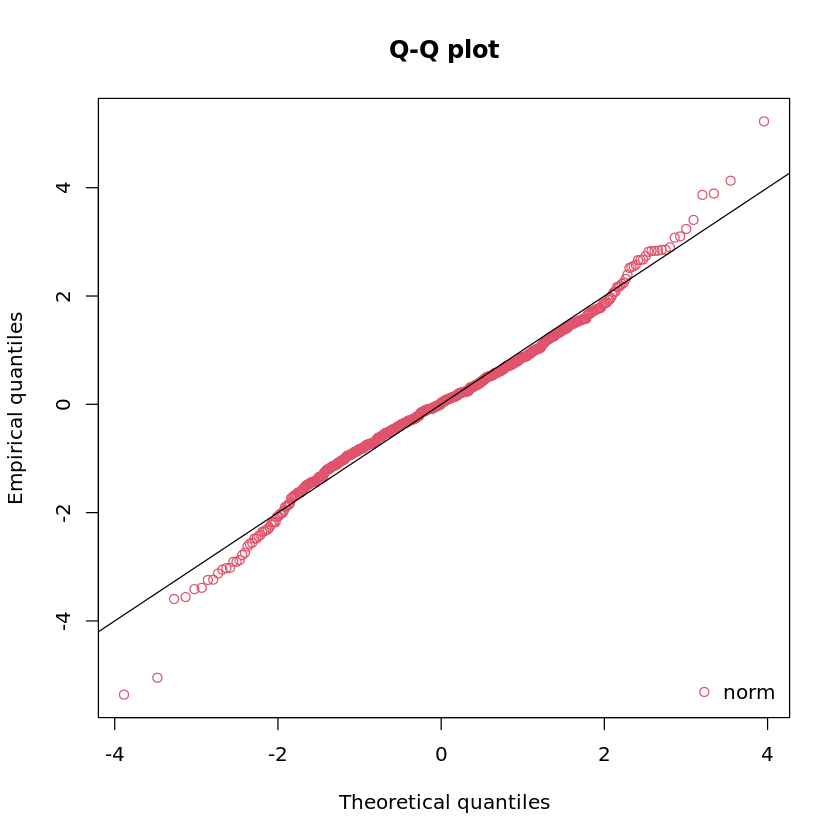

In [21]:
ppcomp(a_norm)
qqcomp(a_norm)

### Tal como anterioremente, al ajustar una Normal hay que tener cautela con las colas. 

### Ahora podemos hacer el pronóstico, de forma similar a lo que hicimos con el modelo de regresión.

In [22]:
pron_ar <- predict(armod7,n.ahead=24)   #n.ahead indica cuantos valores queremos predecir
cat(sprintf("Valores pronosticados\n\n"))
pron_ar$pred
cat(sprintf("\n\n"))
cat(sprintf("Errores estándar\n\n"))
pron_ar$se

Valores pronosticados



A Time Series:
 [1] 67.14568 65.68510 64.74618 65.08383 67.92278 69.41004 72.15089 73.69267
 [9] 73.95117 74.86090 74.38677 73.59711 72.36773 70.70158 69.92183 69.68075
[17] 69.34584 68.49483 69.09045 69.59182 69.51563 68.53706 66.55515 65.47302



Errores estándar



A Time Series:
 [1] 1.308208 1.990651 2.537391 2.993971 3.306275 3.531567 3.655278 3.722783
 [9] 3.765646 3.808177 3.849186 3.882729 3.898587 3.907316 3.912999 3.913960
[17] 3.913960 3.916179 3.920821 3.923291 3.928637 3.932630 3.934979 3.934997

### Veamos los resultados de modo gráfico

#### Para ello, utilizaremos la función *forecast*, que grafica las curvas correspondientes a pron_ar\\$pred $\pm$ 1.96*pron_ar\\$se

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



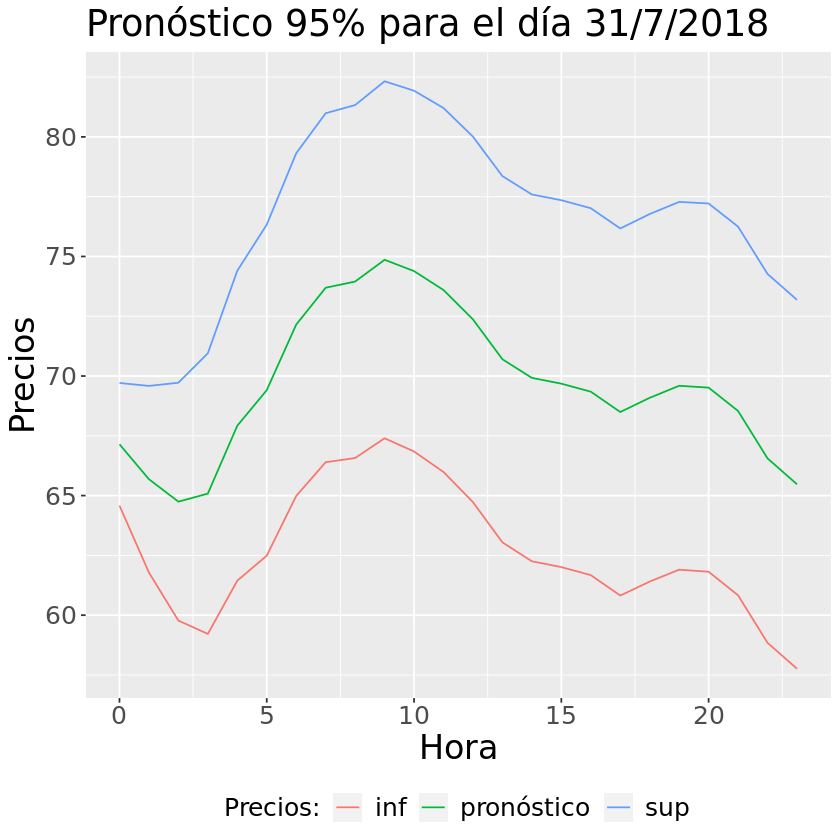

In [24]:
install.packages('forecast')
library(forecast)
types <- c("pron.Point.Forecast"="pronóstico","pron.Lo.95"="inf","pron.Hi.95"="sup", "precio"="real", "sim"="sim")
horas <- data.frame(hora=0:23)

pron_ar_conf <- forecast(armod7,24,level=95)  #Level es el nivel de confianza (95%)

pron.ar.df <- data.frame(hora=horas,pron=pron_ar_conf)
#head(pron.ar.df)
pron.ar2 <- pron.ar.df %>% tidyr::gather("type", "precios", 2:4) 
#head(pron.ar2)
plot.pronostico <- ggplot(pron.ar2,aes(hora,precios,group=type,color=types[type]))+
                     geom_line()+
                     labs(x = 'Hora', y = 'Precios',
                          title='Pronóstico 95% para el día 31/7/2018',
                          color="Precios:")+
                     mytheme
                 
plot.pronostico


### ¿Como se compara el pronóstico con los valores reales?

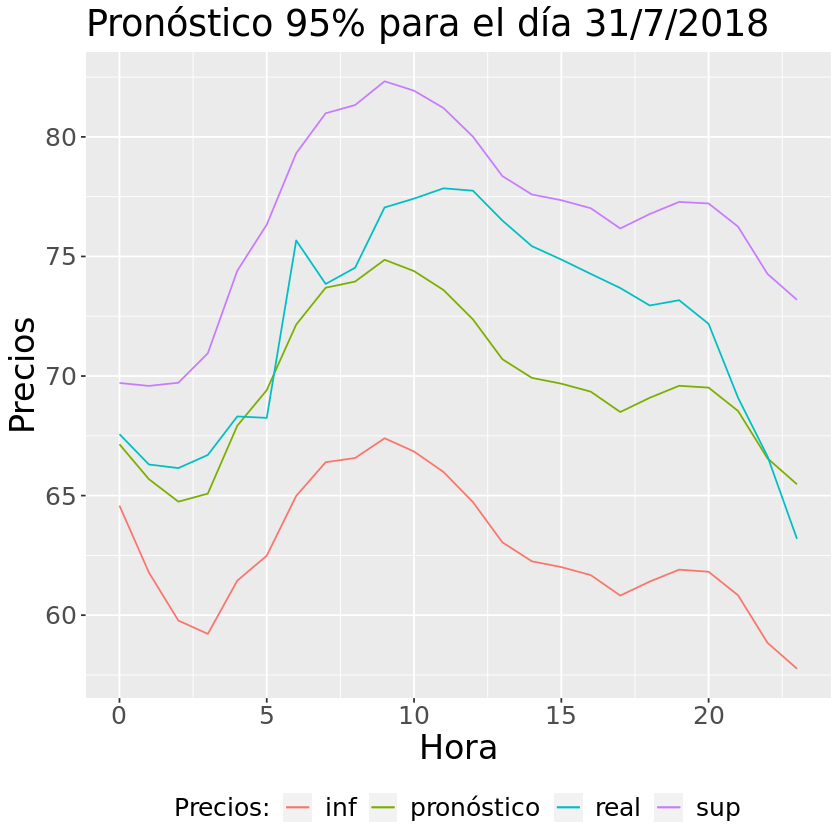

In [25]:
real.df <- cbind(horas,price7_test)
#head(real.df)
real <- real.df %>% tidyr::gather("type", "precios", 2) 
#head(real)
                 
plot.pronostico <- plot.pronostico+geom_line(data=real,aes(hora,precios,color=types[type]))

plot.pronostico

## OK, logramos hacer un buen pronóstico...pero el objetivo final es *simular* la serie de precios!

### ¿Cómo hacerlo? 

### Recordemos la ecuación del proceso auto-regresivo:

### $x_t - \mu = a_1 (x_{t-1} - \mu) +\ldots + a_p (x_{t-p} - \mu) + \epsilon_t$

### Ya hemos determinado que el residuo es Normal con media 0. La desviación estandar y los demás parametros salen del análisis del modelo AR:

In [27]:
m.ar <- armod7$x.mean
s.ar <- sqrt(armod7$var.pred)
p.ar <- armod7$order
cat("mean=", m.ar, "  sd=",s.ar, " order=",p.ar)

mean= 67.63732   sd= 1.308208  order= 25

In [28]:
armod7


Call:
ar(x = price7_train)

Coefficients:
      1        2        3        4        5        6        7        8  
 1.1469  -0.1127  -0.0354  -0.1449   0.0646  -0.1034   0.0745   0.0449  
      9       10       11       12       13       14       15       16  
 0.0761  -0.0791  -0.0433  -0.0783   0.1014   0.0258  -0.0592   0.0115  
     17       18       19       20       21       22       23       24  
-0.0554   0.0411   0.0661  -0.0993   0.0790  -0.0146   0.0527   0.3399  
     25  
-0.3884  

Order selected 25  sigma^2 estimated as  1.711

In [30]:
cat("Coeficientes AR:")
coef <- as.numeric(armod7$ar)
coef

Coeficientes AR:

[1]  1.14693335 -0.11272353 -0.03538831 -0.14486886  0.06462284 -0.10341231
 [7]  0.07454435  0.04487785  0.07610046 -0.07914661 -0.04329509 -0.07834521
[13]  0.10141016  0.02577306 -0.05916836  0.01150564 -0.05543853  0.04106995
[19]  0.06610068 -0.09928616  0.07897688 -0.01458721  0.05267875  0.33988885
[25] -0.38843020

### ¿Cómo hacer la simulación?

In [31]:
sim.ar <- vector(mode="numeric",length=24)
ndata <- length(price7_train)
prev <- price7_train[ndata:(ndata-p.ar+1)]-m.ar
for (i in 1:24){
  sim.ar[i] <- m.ar + coef%*%prev + rnorm(1,0,s.ar)
  prev <- c(sim.ar[i]-m.ar,prev[-p.ar])
    }


### Veamos los resultados:

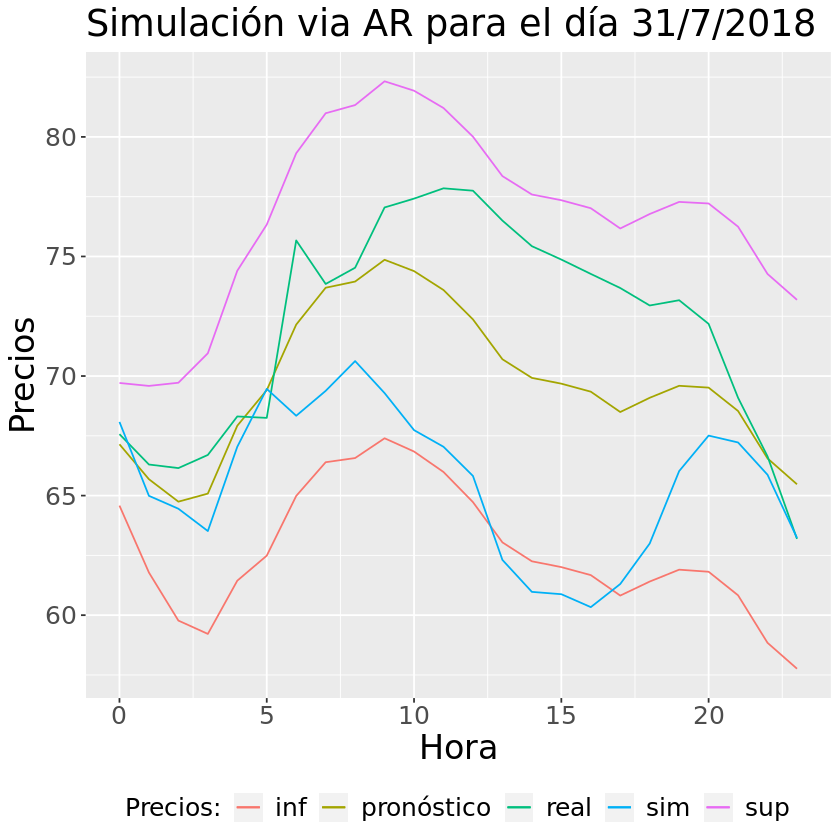

In [32]:
sim.df <- cbind(horas,sim=sim.ar)
#head(sim.df)
sim.plot <- sim.df %>% tidyr::gather("type", "precios", 2) 
#head(sim)
                
plot.pronostico+geom_line(data=sim.plot,aes(hora,precios,color=types[type]))+
                         labs(title='Simulación via AR para el día 31/7/2018')